<a href="https://colab.research.google.com/github/bellasoniadwi/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

**Membuat Fungsi Konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa :

1. citra masukan
2. kernel berupa matriks untuk memfilter citra
3. nilai stride / besarnya pergeseran untuk setiap konvolusi
4. padding = nilai pad yang akan ditambahkan pada citra

In [3]:
def convolution2d(image, kernel, stride, padding):
  # Korelasi Silang
  kernel = np.flipud(np.fliplr(kernel))

  # Gather shapes of Kernel + Image + Padding
  xKern, yKern = kernel.shape[0], kernel.shape[1]
  xImg, yImg = image.shape[0], image.shape[1]

  # Bentuk dari Konvolusi
  xOutput = int(((xImg - xKern + 2 * padding) / stride) + 1)
  yOutput = int(((yImg - yKern + 2 * padding) / stride) + 1)
  output = np.zeros((xOutput, yOutput))

  # Terapkan Equal Padding ke semua Sisi
  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    imagePadded = image

  for y in range(image.shape[1]):
    # Exit Convolution
    if y > image.shape[1] - yKern:
        break
    # Only Convolve if y has gone down by the specified Strides
    if y % stride == 0:
        for x in range(image.shape[0]):
            # Pindah ke baris berikutnya setelah kernel berada di luar batas
            if x > image.shape[0] - xKern:
                break
            try:
                # Only Convolve if x has moved by the specified Strides
                if x % stride == 0:
                    output[x, y] = (kernel * imagePadded[x: x + xKern, y: y + yKern]).sum()
            except:
                break

  return output

**Load image yang akan diproses**

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

**Menentukan kernel yang akan digunakan**

In [5]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

**Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:**

In [6]:
convolution2d(img_gray, kernel_sharpen, 1, 2)

array([[   0., -145.,  -56., ...,    0.,    0.,    0.],
       [-145.,  553.,  -15., ...,    0.,    0.,    0.],
       [-116.,  257.,  179., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

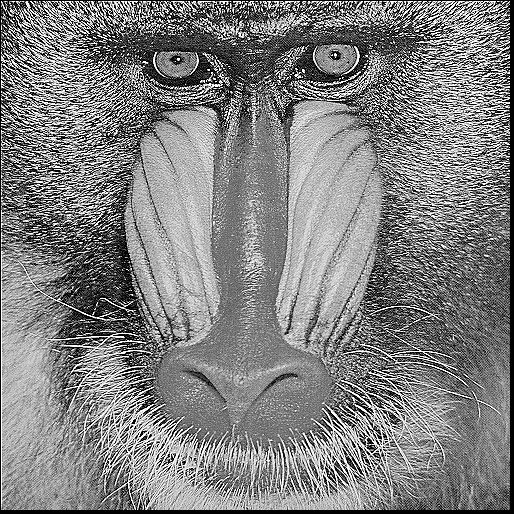

In [7]:
# Menampilkan hasil konvolusinya image sharpen

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

**3. Membuat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter lainnya**

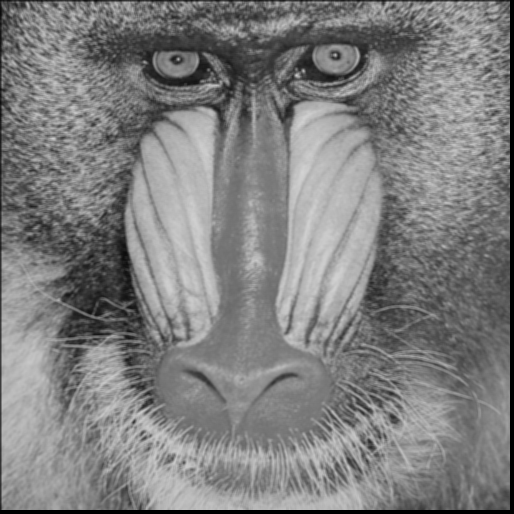

In [8]:
# Average Filter
average_filter = np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]])/9

cv2_imshow(convolution2d(img_gray, average_filter, 1, 2))

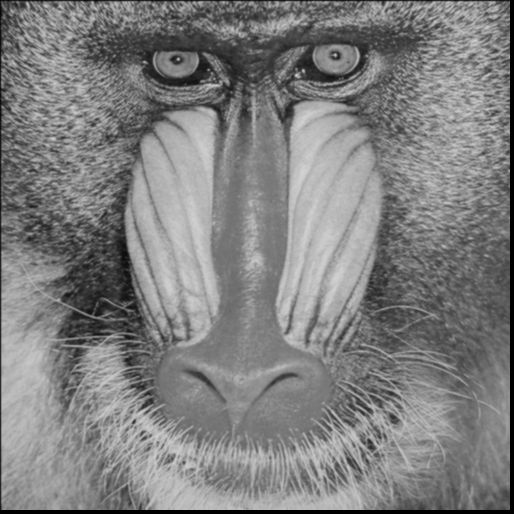

In [9]:
# Low Pass Filter
low_pass = np.array([[1,1,1],
                    [1,4,1],
                    [1,1,1]])/12

cv2_imshow(convolution2d(img_gray, low_pass, 1, 2))

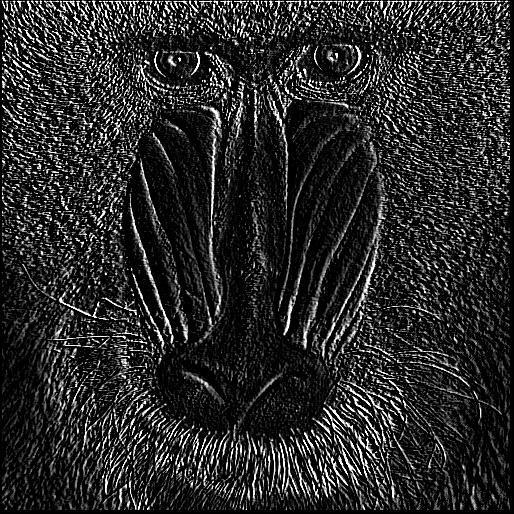

In [10]:
# High Pass Filter
high_pass = np.array([[-1,0,1],
                      [-1,0,3],
                      [-3,0,1]])

cv2_imshow(convolution2d(img_gray, high_pass, 1, 2))

In [ ]:
# Sharpen
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

cv2_imshow(convolution2d(img_gray, sharpen, 1, 2))